# <center> Lending Club Case Study </center>

In [52]:
# libraries to import for the project to work properly

import pandas as pd                 # data analysis and manipulation library for Python
import numpy as np                  # numerical python library for math functions and arrays 
import matplotlib.pyplot as plt     # plotting library for Python
import seaborn as sns               # statistical data visualization library for Python
import datetime                     # library for date and time functions
import warnings                     # library for warning messages and exceptions
warnings.filterwarnings('ignore')   # ignore warnings

In [53]:
# import the data from the csv file

df = pd.read_csv('Data/loan.csv')

In [54]:
# show the first 5 rows of the dataframe df

df.head() 

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


In [55]:
# show the information about the dataframe df

df.info(verbose=True, null_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 111 columns):
 #    Column                          Non-Null Count  Dtype  
---   ------                          --------------  -----  
 0    id                              39717 non-null  int64  
 1    member_id                       39717 non-null  int64  
 2    loan_amnt                       39717 non-null  int64  
 3    funded_amnt                     39717 non-null  int64  
 4    funded_amnt_inv                 39717 non-null  float64
 5    term                            39717 non-null  object 
 6    int_rate                        39717 non-null  object 
 7    installment                     39717 non-null  float64
 8    grade                           39717 non-null  object 
 9    sub_grade                       39717 non-null  object 
 10   emp_title                       37258 non-null  object 
 11   emp_length                      38642 non-null  object 
 12   home_ownership  

In [56]:
print('The shape of the dataframe df is {}.'.format(df.shape))                               # print the shape of the dataframe df
print('The dataframe df has {} rows and {} columns.'.format(df.shape[0], df.shape[1]))       # print the number of rows and columns in the dataframe df

The shape of the dataframe df is (39717, 111).
The dataframe df has 39717 rows and 111 columns.


## Customer Behavior Variables
* delinq_2yrs
* earliest_cr_line
* inq_last_6mths
* open_acc
* pub_rec
* revol_bal
* revol_util
* total_acc
* out_prncp
* out_prncp_inv
* total_pymnt
* total_pymnt_inv
* total_rec_prncp
* total_rec_int
* total_rec_late_fee
* recoveries
* collection_recovery_fee
* last_pymnt_d
* last_pymnt_amnt
* last_credit_pull_d
* application_type

The customer behavior variables are not available at the time of loan application and hence they cannot be used as predictors for credit approval.

### Recommendations:
    1. Drop these columns since they are not available at the time of loan application.

In [57]:
# drop the customer behavior variables

cus_beh_var = ['delinq_2yrs','earliest_cr_line','inq_last_6mths','open_acc','pub_rec','revol_bal','revol_util','total_acc',             # columns to be dropped
               'out_prncp','out_prncp_inv','total_pymnt','total_pymnt_inv','total_rec_prncp','total_rec_int','total_rec_late_fee',
               'recoveries','collection_recovery_fee','last_pymnt_d','last_pymnt_amnt','last_credit_pull_d','application_type']

df.drop(cus_beh_var, axis=1, inplace=True)               # drop the columns 'cus_beh_var' from the dataframe 'df'

Customer behavior variables are dropped from the dataframe.

In [58]:
# show the percentage of missing values in each column

percent_missing = df.isnull().sum() * 100 / len(df)
missing_value_df = pd.DataFrame({'column_name': df.columns,
                                 'percent_missing': percent_missing})
missing_value_df.sort_values(by='percent_missing', ascending=False)

,column_name,percent_missing
open_rv_12m,open_rv_12m,100.0
bc_open_to_buy,bc_open_to_buy,100.0
mths_since_recent_bc_dlq,mths_since_recent_bc_dlq,100.0
mths_since_recent_bc,mths_since_recent_bc,100.0
mort_acc,mort_acc,100.0
...,...,...
delinq_amnt,delinq_amnt,0.0
policy_code,policy_code,0.0
acc_now_delinq,acc_now_delinq,0.0
member_id,member_id,0.0


### Insights:
    We can see that some of the columns have all values missing and some columns have no values missing.

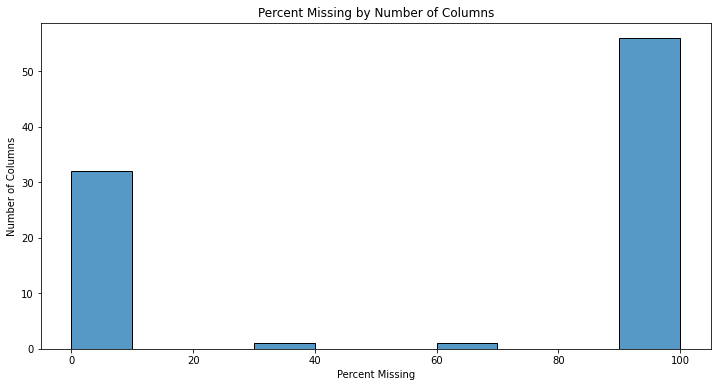

In [59]:
# plot the number of columns with percentage of missing values

plt.figure(figsize=(12,6))
ax = sns.histplot(x='percent_missing', data=missing_value_df, bins=10)
ax.set_xlabel('Percent Missing')
ax.set_ylabel('Number of Columns')
ax.set_title('Percent Missing by Number of Columns')
plt.show()

### Insights:
    1. More than 50 columns have more than 90% of their values missing.
    2. Atleast 1 column has 30-40 percentage of values missing.
    3. Atleast 1 column has 60-70 percentage of values missing.
    4. More than 30 columns have 0-10 percentage of values missing.

### Recommendations:
    1. Drop columns with more than 90% of values missing.
    2. For columns with less than 90% percentage missing values, impute the missing values or else drop the columns if impute is not possible.

In [60]:
# delete columns containing either 90% or more than 90% NaN Values
perc = 90.0
min_count =  int(((100-perc)/100)*df.shape[0] + 1)
df = df.dropna(axis=1, thresh=min_count)

Columns containing more than 90% of values missing are dropped from the dataframe.

In [61]:
# show the percentage of missing values in the remaining columns

percent_missing = df.isnull().sum() * 100 / len(df)
missing_value_df = pd.DataFrame({'column_name': df.columns,
                                 'percent_missing': percent_missing})
missing_value_df.sort_values(by='percent_missing', ascending=False)

,column_name,percent_missing
mths_since_last_delinq,mths_since_last_delinq,64.662487
desc,desc,32.580507
emp_title,emp_title,6.191303
emp_length,emp_length,2.706650
pub_rec_bankruptcies,pub_rec_bankruptcies,1.754916
chargeoff_within_12_mths,chargeoff_within_12_mths,0.140998
collections_12_mths_ex_med,collections_12_mths_ex_med,0.140998
tax_liens,tax_liens,0.098195
title,title,0.027696
delinq_amnt,delinq_amnt,0.000000


In [62]:
# check the column having more than 60% missing values

df['mths_since_last_delinq'].value_counts(dropna=False)     # show the value counts of the column 'mths_since_last_delinq'

NaN      25682
0.0        443
15.0       252
30.0       247
23.0       247
         ...  
89.0         1
107.0        1
85.0         1
97.0         1
95.0         1
Name: mths_since_last_delinq, Length: 96, dtype: int64

Since most of the values are missing, drop the column

In [63]:
# drop the column having more than 60% missing values

df.drop('mths_since_last_delinq', axis=1, inplace=True)    # drop the column

Column 'mths_since_last_delinq' is dropped from the dataframe.

In [64]:
# check the 'desc' column

print('The number of unique values in the column desc is {}.'.format(df['desc'].nunique()))  # print the number of unique values in the column 'desc'
df['desc'].value_counts(dropna=False)                                                        # show the value counts of the column 'desc'

The number of unique values in the column desc is 26527.


NaN                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                           12940
                                                                                                                                                                                                                                                                                                                                                    

### Insights:
    1. This column is provided by the applicant at the time of loan application.
    2. This column contains the description provided by the applicant at the time of loan application for why he/she is taking the loan.
    3. This column has more than 30%  of values missing.
    4. This column has mostly unique values.

### Recommendations:
    1. Drop this column since impute is not possible because of large number of unique and missing values.
    2. Drop this column as we are not doing any NLP and is not required for our analysis.

In [65]:
# drop the 'desc' column having many unique and missing values

df.drop('desc', axis=1, inplace=True)                                # drop the column

Column 'desc' is dropped from the dataframe.

In [66]:
# check the 'emp_title' column
print('The number of unique values in the column emp_title is {}.'.format(df['emp_title'].nunique()))  # print the number of unique values in the column 'emp_title'
df['emp_title'].value_counts(dropna=False)                                                             # show the value counts of the column 'emp_title'

The number of unique values in the column emp_title is 28820.


NaN                                2459
US Army                             134
Bank of America                     109
IBM                                  66
AT&T                                 59
                                   ... 
AMEC                                  1
lee county sheriff                    1
Bacon County Board of Education       1
Hotpads                               1
Evergreen Center                      1
Name: emp_title, Length: 28821, dtype: int64

### Insights:
    1. This column contains the name of the employer of the loan applicant.
    2. This column contains missing values and high unique values.

### Recommendations:
    1. Drop this column since impute is not possible because of large number of unique and missing values.
    2. Drop this column as it is not required for our analysis.

In [67]:
# drop the 'emp_title' column having many unique and missing values

df.drop('emp_title', axis=1, inplace=True)                           # drop the column

Column 'emp_title' is dropped from the dataframe.

In [68]:
# check the 'emp_length' column

print('The number of unique values in the column emp_length is {}.'.format(df['emp_length'].nunique()))  # print the number of unique values in the column 'emp_title'
df['emp_length'].value_counts(dropna=False)                                                              # show the value counts of the column 'emp_title'

The number of unique values in the column emp_length is 11.


10+ years    8879
< 1 year     4583
2 years      4388
3 years      4095
4 years      3436
5 years      3282
1 year       3240
6 years      2229
7 years      1773
8 years      1479
9 years      1258
NaN          1075
Name: emp_length, dtype: int64

### Insights:
    1. This column contains the work experience in years of the loan applicant.
    2. From the data dictionary, we can say that this column has a range from 0 to 10 years.
    3. This column has missing values.

### Recommendations:
    1. Assume the NaN values as 0, which means that the loan applicant has no work experience.
    2. Assume people with less than 1 year of work experience as having no work experience.
    3. Assume people having more than 10 years of work experience as having 10 years of work experience.
    4. Clean the column by removing the symbols and text and convert the values to numeric.


In [69]:
# clean the 'emp_length' column and convert it to numeric type 

def clean_emp(i):                              # define a function to clean the 'emp_length' column
    i = i.str.replace('< 1 year','0')           
    i = i.fillna('0')                           
    i = i.str.replace(' ','')
    i = i.str.replace('years','')
    i = i.str.replace('year','')
    i = i.str.replace('+','')
    i = i.astype('int64')
    return i

df['emp_length'] = clean_emp(df['emp_length'])  # apply the function to the 'emp_length' column

In [70]:
df['emp_length'].value_counts(dropna=False)      # show the value counts of the column 'emp_length'

10    8879
0     5658
2     4388
3     4095
4     3436
5     3282
1     3240
6     2229
7     1773
8     1479
9     1258
Name: emp_length, dtype: int64

'emp_length' is now a numeric column with missing values imputed as 0 and cleaned. This column is now suitable for our analysis.

In [71]:
# check the 'pub_rec_bankruptcies' column

print('The number of unique values in the column pub_rec_bankruptcies is {}.'.format(df['pub_rec_bankruptcies'].nunique()))  # print the number of unique values in the column 'pub_rec_bankruptcies'
df['pub_rec_bankruptcies'].value_counts(dropna=False)                                                                        # show the value counts of the column 'pub_rec_bankruptcies'

The number of unique values in the column pub_rec_bankruptcies is 3.


0.0    37339
1.0     1674
NaN      697
2.0        7
Name: pub_rec_bankruptcies, dtype: int64

### Insights:
    1. This column contains the number of public record bankruptcies of the loan applicant.
    2. This column has missing values.
    3. Most of the loan applicants have 0 public record bankruptcies.

### Recommendations:
    1. Impute the missing values by using mode of the column.

In [72]:
# clean the 'pub_rec_bankruptcies' column

df['pub_rec_bankruptcies'].fillna(df['pub_rec_bankruptcies'].mode()[0], inplace=True)   # fill the missing values with the mode of the column 'pub_rec_bankruptcies'
df['pub_rec_bankruptcies'] = df['pub_rec_bankruptcies'].astype('int64')                 # convert the column 'pub_rec_bankruptcies' to integer type
df['pub_rec_bankruptcies'].value_counts()                                               # show the value counts of the column 'pub_rec_bankruptcies'

0    38036
1     1674
2        7
Name: pub_rec_bankruptcies, dtype: int64

'pub_rec_bankruptcies' is now a numeric column with missing values imputed as 0 and cleaned. This column is now suitable for our analysis.

In [73]:
# show the percentage of missing values in the remaining columns

percent_missing = df.isnull().sum() * 100 / len(df)
missing_value_df = pd.DataFrame({'column_name': df.columns,
                                 'percent_missing': percent_missing})
missing_value_df.sort_values(by='percent_missing', ascending=False)

,column_name,percent_missing
chargeoff_within_12_mths,chargeoff_within_12_mths,0.140998
collections_12_mths_ex_med,collections_12_mths_ex_med,0.140998
tax_liens,tax_liens,0.098195
title,title,0.027696
pymnt_plan,pymnt_plan,0.000000
pub_rec_bankruptcies,pub_rec_bankruptcies,0.000000
delinq_amnt,delinq_amnt,0.000000
acc_now_delinq,acc_now_delinq,0.000000
policy_code,policy_code,0.000000
initial_list_status,initial_list_status,0.000000


In [74]:
# check the 'title' column

print("The number of missing values in the column 'title' is {}.".format(df['title'].isna().sum()))  # print the number of unique values in the column 'title'
print("The number of unique values in the column 'title' is {}.".format(df['title'].nunique()))      # print the number of unique values in the column 'title'
df['title'].value_counts(dropna=False)                                                               # show the value counts of the column 'title'

The number of missing values in the column 'title' is 11.
The number of unique values in the column 'title' is 19615.


Debt Consolidation                  2184
Debt Consolidation Loan             1729
Personal Loan                        659
Consolidation                        517
debt consolidation                   505
                                    ... 
your rate is better than my rate       1
Concession Trailer                     1
gregs                                  1
EZover                                 1
JAL Loan                               1
Name: title, Length: 19616, dtype: int64

### Insights:
    1. This column contains the loan title provided by the borrower at the time of loan application.
    2. This column has missing values and high unique values.
    3. This column contains information that cannot be trusted since it is provided by the borrower at the time of loan application hence it is not reliable.

### Recommendations:
    1. Drop this column since the information is not reliable.

In [75]:
# drop the 'title' column

df.drop('title', axis=1, inplace=True)                                                           # drop the column 'title' from the dataframe 'df'

Column 'title' is dropped from the dataframe.

In [76]:
# check the percentage of unique values in the remaining columns

percent_unique = df.nunique() * 100 / len(df)
unique_value_df = pd.DataFrame({'column_name': df.columns,
                                'percent_unique': percent_unique})
unique_value_df.sort_values(by='percent_unique', ascending=False)

,column_name,percent_unique
id,id,100.000000
url,url,100.000000
member_id,member_id,100.000000
installment,installment,38.731526
funded_amnt_inv,funded_amnt_inv,20.658660
annual_inc,annual_inc,13.389732
dti,dti,7.221089
funded_amnt,funded_amnt,2.621044
loan_amnt,loan_amnt,2.228265
zip_code,zip_code,2.072161


### Insights:
    1. There are 3 columns with 100% unique values, which is not a good indicator for our analysis.
    2. There are 8 columns with 0.002518% unique values, which are columns that have only one unique value. These columns cannot be used as predictors for credit approval.

### Recommendations:
    1. Drop the columns with 100% unique values.
    2. Drop the columns with 0.002518% unique values (only 1 unique value).

In [77]:
# drop the columns having 100% unique values

df.drop(df.columns[df.nunique() * 100 / len(df) == 100], axis=1, inplace=True)           # drop the columns 'id','url','member_id' from the dataframe 'df'

Columns having 100% unique values are dropped from the dataframe.

In [78]:
# drop the columns having only one unique value

df.drop(df.columns[df.nunique() == 1], axis=1, inplace=True)              # drop the columns having only one unique value from the dataframe 'df'

Columns having only one unique value are dropped from the dataframe.

In [79]:
# check the first 5 rows of the dataframe 'df'

df.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,zip_code,addr_state,dti,pub_rec_bankruptcies
0,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,10,RENT,24000.0,Verified,Dec-11,Fully Paid,credit_card,860xx,AZ,27.65,0
1,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,0,RENT,30000.0,Source Verified,Dec-11,Charged Off,car,309xx,GA,1.00,0
2,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,10,RENT,12252.0,Not Verified,Dec-11,Fully Paid,small_business,606xx,IL,8.72,0
3,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,10,RENT,49200.0,Source Verified,Dec-11,Fully Paid,other,917xx,CA,20.00,0
4,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,1,RENT,80000.0,Source Verified,Dec-11,Current,other,972xx,OR,17.94,0


In [80]:
# check the datatypes of the columns in the dataframe 'df'

df.dtypes

loan_amnt                 int64
funded_amnt               int64
funded_amnt_inv         float64
term                     object
int_rate                 object
installment             float64
grade                    object
sub_grade                object
emp_length                int64
home_ownership           object
annual_inc              float64
verification_status      object
issue_d                  object
loan_status              object
purpose                  object
zip_code                 object
addr_state               object
dti                     float64
pub_rec_bankruptcies      int64
dtype: object

### Insights:
    1. There are some categorical columns which can be converted to numeric columns. These columns are:
        * term
        * grade
        * sub_grade
        * home_ownership
        * loan_status
        * verification_status
        
    2. There is a continuous column which can be converted to numeric column. This column is:
        * int_rate

    3. There is a date column with object dtype which can be converted to datetime column. This column is:
        * issue_d

### Recommendations:
    1. Convert the categorical columns to numeric columns.
    2. Convert the continuous column to numeric column.
    3. Convert the date column  of 'obj' dtype to datetime column.
    

In [81]:
# check the 'term' column

print('The number of unique values in the column term is {}.'.format(df['term'].nunique()))  # print the number of unique values in the column 'term'
df['term'].value_counts(dropna=False)                                                        # show the value counts of the column 'term'

The number of unique values in the column term is 2.


 36 months    29096
 60 months    10621
Name: term, dtype: int64

*Assume 0 for the 'term' column containing '36 months'.

*Assume 1 for the 'term' column containing '60 months'. 

In [82]:
# clean the 'term' column

df['term'] = df['term'].replace(' 36 months', 0)          # replace the string ' 36 months' with 0 in the column 'term'
df['term'] = df['term'].replace(' 60 months', 1)          # replace the string ' 60 months' with 1 in the column 'term'
df['term'].value_counts()                                 # show the cleaned column 'term'

0    29096
1    10621
Name: term, dtype: int64

In [83]:
df['term']                  # show the cleaned column 'term'

0        0
1        1
2        0
3        0
4        1
        ..
39712    0
39713    0
39714    0
39715    0
39716    0
Name: term, Length: 39717, dtype: int64

Column 'term' is now a numeric column. This column is now suitable for our analysis.

In [84]:
# check the grade column 

print('The number of unique values in the column grade is {}.'.format(df['grade'].nunique()))  # print the number of unique values in the column 'grade'
df['grade'].value_counts(dropna=False).sort_index()                                            # show the value counts of the column 'grade'

The number of unique values in the column grade is 7.


A    10085
B    12020
C     8098
D     5307
E     2842
F     1049
G      316
Name: grade, dtype: int64

### Insights:
    1. This column contains the grade of the loan applicant.
    2. Grade = A is the highest grade.
    3. Grade = G is the lowest grade.

### Recommendations:
    1. Replace the string values with numeric values corresponding to the rank of the grade such that A = 1, B = 2, C = 3, D = 4, E = 5, F = 6, G = 7.

In [85]:
df['grade'].value_counts(dropna=False).sort_index().index       # list of unique grade values in the 'grade' column

Index(['A', 'B', 'C', 'D', 'E', 'F', 'G'], dtype='object')

In [86]:
np.arange(1,(df['grade'].nunique())+1)                          # list of rank values for the 'grade' column

array([1, 2, 3, 4, 5, 6, 7])

In [87]:
# clean the 'grade' column

df['grade'] = df['grade'].replace(df['grade'].value_counts(dropna=False).sort_index().index, np.arange(1,(df['grade'].nunique())+1))       # replace the values in the 'grade' column with their corresponding rank values
df['grade'].value_counts().sort_index()         # show the value counts of the column 'grade

1    10085
2    12020
3     8098
4     5307
5     2842
6     1049
7      316
Name: grade, dtype: int64

Column 'grade' is now a numeric categorical column. This column is now suitable for our analysis.

In [88]:
# check the 'sub_grade' column

print('The number of unique values in the column sub_grade is {}.'.format(df['sub_grade'].nunique()))  # print the number of unique values in the column 'sub_grade'
df['sub_grade'].value_counts(dropna=False).sort_index()                                                # show the value counts of the column 'sub_grade'

The number of unique values in the column sub_grade is 35.


A1    1139
A2    1508
A3    1810
A4    2886
A5    2742
B1    1830
B2    2057
B3    2917
B4    2512
B5    2704
C1    2136
C2    2011
C3    1529
C4    1236
C5    1186
D1     931
D2    1348
D3    1173
D4     981
D5     874
E1     763
E2     656
E3     553
E4     454
E5     416
F1     329
F2     249
F3     185
F4     168
F5     118
G1     104
G2      78
G3      48
G4      56
G5      30
Name: sub_grade, dtype: int64

### Insights:
    1. This column contains the sub grade of the loan applicant.
    2. Sub grade = A1 is the highest sub grade.
    3. Sub grade = G5 is the lowest sub grade.

### Recommendations:
    1. Replace the string values with numeric values corresponding to the rank of the sub grade such that A1 = 1, A2 = 2, A3 = 3, A4 = 4, A5 = 5, B1 = 6, B2 = 7, B3 = 8, B4 = 9, B5 = 10, C1 = 11, C2 = 12, C3 = 13, C4 = 14, C5 = 15, D1 = 16, D2 = 17, D3 = 18, D4 = 19, D5 = 20, E1 = 21, E2 = 22, E3 = 23, E4 = 24, E5 = 25, F1 = 26, F2 = 27, F3 = 28, F4 = 29, F5 = 30, G1 = 31, G2 = 32, G3 = 33, G4 = 34, G5 = 35.

In [89]:
df['sub_grade'].value_counts(dropna=False).sort_index().index               # list of unique values in the 'sub_grade' column

Index(['A1', 'A2', 'A3', 'A4', 'A5', 'B1', 'B2', 'B3', 'B4', 'B5', 'C1', 'C2',
       'C3', 'C4', 'C5', 'D1', 'D2', 'D3', 'D4', 'D5', 'E1', 'E2', 'E3', 'E4',
       'E5', 'F1', 'F2', 'F3', 'F4', 'F5', 'G1', 'G2', 'G3', 'G4', 'G5'],
      dtype='object')

In [90]:
np.arange(1,(df['sub_grade'].nunique())+1,1)                                # list of rank values for the 'sub_grade' column

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35])

In [91]:
# clean the 'sub_grade' column

df['sub_grade'] = df['sub_grade'].replace(df['sub_grade'].value_counts(dropna=False).sort_index().index, np.arange(1,(df['sub_grade'].nunique())+1))        # replace the values in the 'sub_grade' column with their corresponding rank values
df['sub_grade'].value_counts().sort_index()         # show the value counts of the 'sub_grade' column

1     1139
2     1508
3     1810
4     2886
5     2742
6     1830
7     2057
8     2917
9     2512
10    2704
11    2136
12    2011
13    1529
14    1236
15    1186
16     931
17    1348
18    1173
19     981
20     874
21     763
22     656
23     553
24     454
25     416
26     329
27     249
28     185
29     168
30     118
31     104
32      78
33      48
34      56
35      30
Name: sub_grade, dtype: int64

Column 'sub_grade' is now a numeric categorical column. This column is now suitable for our analysis.

In [92]:
# check the 'loan_status' column

df['loan_status'].value_counts()        # show the value counts of the 'loan_status' column

Fully Paid     32950
Charged Off     5627
Current         1140
Name: loan_status, dtype: int64

### Insights:
    1. This column contains the loan status of the loan applicant.
    2. Loan status = Current cannot be used for our analysis because the loan is still in progress, hence it is not useful for our analysis.

### Recommendations:
    1. Drop the rows containing 'Current'.
    2. Convert the column to numeric column by assigning 0 for 'Fully Paid' and 1 for 'Charged Off'.

In [93]:
# clean the 'loan_status' column

df = df[df['loan_status'] != 'Current']                         # drop the rows with 'loan_status' value 'Current'
df[df['loan_status'] == 'Fully Paid']['loan_status'] = 1        # replace the 'loan_status' value 'Fully Paid' with 1
df[df['loan_status'] == 'Charged Off']['loan_status'] = 0       # replace the 'loan_status' value 'Charged Off' with 0
df['loan_status'].value_counts()                                # show the value counts of the 'loan_status' column

Fully Paid     32950
Charged Off     5627
Name: loan_status, dtype: int64

Column 'loan_status' is now a numeric categorical column. This column is now suitable for our analysis.

In [94]:
# check the 'verification_status' column

df['verification_status'].value_counts()        # show the value counts of the 'verification_status' column

Not Verified       16694
Verified           12206
Source Verified     9677
Name: verification_status, dtype: int64

### Insights:
    1. This column contains the income verification status of the loan applicant.
    2. Verification status = Source Verified is the highest verification status.
    3. Verification status = Not Verified is the lowest verification status.

### Recommendations:
    1. Replace the string values with numeric values corresponding to the rank of the verification status such that Source Verified = 1, Verified = 2, Not Verified = 3.

In [95]:
# clean the 'verification_status' column

df['verification_status'] = df['verification_status'].replace('Source Verified', 1)     # replace the 'verification_status' value 'Source Verified' with 1
df['verification_status'] = df['verification_status'].replace('Verified', 2)            # replace the 'verification_status' value 'Not Verified' with 2
df['verification_status'] = df['verification_status'].replace('Not Verified', 3)        # replace the 'verification_status' value 'Verified' with 3
df['verification_status'].value_counts()                                                # show the value counts of the 'verification_status' column

3    16694
2    12206
1     9677
Name: verification_status, dtype: int64

Column 'verification_status' is now a numeric categorical column. This column is now suitable for our analysis.

In [96]:
# check the 'int_rate' column

df['int_rate'].value_counts()            # show the value counts of the 'int_rate' column

10.99%    913
11.49%    790
7.51%     787
13.49%    749
7.88%     725
         ... 
16.96%      1
18.36%      1
16.15%      1
16.01%      1
16.20%      1
Name: int_rate, Length: 370, dtype: int64

### Recommendations:
    1. Remove the percentage symbol from the 'int_rate' column.
    2. Convert the column to numeric column which is suitable for our analysis.

In [97]:
# clean the percentage column
def clean_percentages(i):               # function to clean the percentage column
    i = i.str.replace('%', '')          # replace the '%' with an empty string
    i = i.astype('float64')             # convert the column to float64
    return i

df['int_rate'] = clean_percentages(df['int_rate'])   # clean the 'int_rate' column
df['int_rate'].value_counts()            # show the value counts of the 'int_rate' column

10.99    913
11.49    790
7.51     787
13.49    749
7.88     725
        ... 
16.96      1
18.36      1
16.15      1
16.01      1
16.20      1
Name: int_rate, Length: 370, dtype: int64

Column 'int_rate' is now a numeric column. This column is now suitable for our analysis.

In [98]:
# check the 'issue_d' column

df['issue_d'].value_counts()            # show the value counts of the 'issue_d' column

Nov-11    2062
Dec-11    2042
Oct-11    1941
Sep-11    1913
Aug-11    1798
Jul-11    1745
Jun-11    1728
May-11    1609
Apr-11    1559
Mar-11    1442
Jan-11    1380
Feb-11    1297
Dec-10    1267
Oct-10    1132
Nov-10    1121
Jul-10    1119
Sep-10    1086
Aug-10    1078
Jun-10    1029
May-10     920
Apr-10     827
Mar-10     737
Feb-10     627
Nov-09     602
Dec-09     598
Jan-10     589
Oct-09     545
Sep-09     449
Aug-09     408
Jul-09     374
Jun-09     356
May-09     319
Apr-09     290
Mar-09     276
Feb-09     260
Jan-09     239
Mar-08     236
Dec-08     223
Nov-08     184
Feb-08     174
Jan-08     171
Apr-08     155
Oct-08      96
Dec-07      85
Jul-08      83
May-08      71
Aug-08      71
Jun-08      66
Oct-07      47
Nov-07      37
Aug-07      33
Sep-08      32
Jul-07      30
Sep-07      18
Jun-07       1
Name: issue_d, dtype: int64

### Insights:
    1. This column contains the month and year of the loan application.
    2. This column has the dtype of 'object'.

### Recommendations:
    1. Convert the column to datetime column.

In [99]:
# clean the 'issue_d' column

def clean_date(i):                              # function to clean the 'issue_d' column
    i = i.str.replace('-', ' ')                 # replace the '-' with ' ' in the 'issue_d' column
    i = i.str[:4]+'20'+i.str[4:]                # add '20' to the year in the 'issue_d' column
    i = pd.to_datetime(i).dt.to_period('M')     # convert the 'issue_d' column to 'M'onth format
    return(i)   

df['issue_d'] = clean_date(df['issue_d'])       # replace the 'issue_d' column with the cleaned values
df['issue_d']                                   # show the 'issue_d' column

0        2011-12
1        2011-12
2        2011-12
3        2011-12
5        2011-12
          ...   
39712    2007-07
39713    2007-07
39714    2007-07
39715    2007-07
39716    2007-06
Name: issue_d, Length: 38577, dtype: period[M]

Column 'issue_d' is now a datetime column. This column is now suitable for our analysis.

In [100]:
# check the 'zip_code' column

df['zip_code'].value_counts()            # show the value counts of the 'zip_code' column

100xx    583
945xx    531
112xx    502
606xx    493
070xx    455
        ... 
463xx      1
381xx      1
592xx      1
414xx      1
469xx      1
Name: zip_code, Length: 822, dtype: int64

### Insights:
    1. This column contains the zip code of the loan applicant.
    2. The last two digits of the zip code are removed for privacy reasons.

### Recommendations:
    1. Drop the 'zip_code' column.

In [101]:
# drop the 'zip_code' column

df.drop('zip_code', axis=1, inplace=True)       # drop the 'zip_code' column

Column 'zip_code' is dropped from the dataframe.

In [102]:
# check the information of the dataframe

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38577 entries, 0 to 39716
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype    
---  ------                --------------  -----    
 0   loan_amnt             38577 non-null  int64    
 1   funded_amnt           38577 non-null  int64    
 2   funded_amnt_inv       38577 non-null  float64  
 3   term                  38577 non-null  int64    
 4   int_rate              38577 non-null  float64  
 5   installment           38577 non-null  float64  
 6   grade                 38577 non-null  int32    
 7   sub_grade             38577 non-null  int32    
 8   emp_length            38577 non-null  int64    
 9   home_ownership        38577 non-null  object   
 10  annual_inc            38577 non-null  float64  
 11  verification_status   38577 non-null  int64    
 12  issue_d               38577 non-null  period[M]
 13  loan_status           38577 non-null  object   
 14  purpose               38577 non-null  

### <center>Data Description</center>
| Column | Description | Data Type |
| ------ | ----------- | --------- |
| loan_amnt | The loan amount of the loan applicant | continuous numeric |
| funded_amnt | The amount of the loan funded by the lending club | continuous numeric |
| funded_amnt_inv | The amount of the loan dispersed by the lending club | continuous numeric |
| term | The term of the loan | categorical numeric (36 Months = 0, 60 Months = 1)|
| int_rate | The interest rate of the loan | continuous numeric |
| installment | The installment of the loan | continuous numeric |
| grade | The grade of the loan | ordered categorical numeric (A = 1, B = 2,..., G = 7)|
| sub_grade | The sub grade of the loan | ordered categorical numeric (A1 = 1, A2 = 2,..., G5 = 35)|
| emp_length | The length of the employment of the loan applicant | ordered categorical numeric (0-1 Year = 0, 1-2 Years = 1,...,10+ Years = 10) |
| home_ownership | The home ownership of the loan applicant | categorical non-numeric |
| annual_inc | The annual income of the loan applicant | continuous numeric |
| verification_status | The income verification status of the loan applicant | ordered categorical numeric (Source Verified = 1, Verified = 2, Not Verified = 3)|
| issue_d | The date of the loan application | datetime |
| loan_status | The loan status of the loan applicant | ordered categorical numeric (Fully Paid = 1, Charged-Off = 2)|
| purpose | The purpose of the loan | categorical non-numeric |
| addr_state | The state of the loan applicant | categorical non-numeric |
| dti | The debt-to-income ratio of the loan applicant | continuous numeric |
| pub_rec_bankruptcies | The number of public record bankruptcies of the loan applicant | ordered categorical numeric |

In [103]:
print('The cleaned dataframe has {} rows and {} columns.'.format(df.shape[0], df.shape[1]))  # print the number of rows and columns in the cleaned dataframe

The cleaned dataframe has 38577 rows and 18 columns.
